In [18]:
import pandas as pd
import json

import matplotlib.pyplot as plt

In [2]:
#!pip install datasets

In [3]:
from datasets import load_dataset

In [5]:
data = load_dataset("json", data_files="new_matching.json")

Using custom data configuration default-510b7b2ef9812173


100%|██████████| 1/1 [00:00<00:00, 373.26it/s]


Dataset json downloaded and prepared to /home/selim/.cache/huggingface/datasets/json/default-510b7b2ef9812173/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00, 102.45it/s]


In [9]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'sentences', 'excerpt_sentence_indices', 'excerpts', 'raw_excerpts'],
        num_rows: 1713
    })
})

In [14]:
pd_data = pd.DataFrame(data)
pd_data['id'] = pd_data.train.apply(lambda x: x['id'])
pd_data['text'] = pd_data.train.apply(lambda x: x['text'])
pd_data['sentences'] = pd_data.train.apply(lambda x: x['sentences'])
pd_data['raw_excerpts'] = pd_data.train.apply(lambda x: x['raw_excerpts'])
pd_data['excerpts'] = pd_data.train.apply(lambda x: x['excerpts'])
pd_data['excerpt_sentence_indices'] = pd_data.train.apply(lambda x: x['excerpt_sentence_indices'])
pd_data.drop(inplace=True, columns=['train'])

Text(0.5, 1.0, 'estimated time for processing using pretrained models')

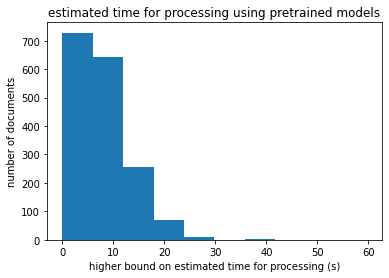

In [23]:
len_sentences = pd_data.sentences.apply(lambda x: len(x) / 3)
plt.hist(len_sentences)
plt.ylabel('number of documents')
plt.xlabel('higher bound on estimated time for processing (s)')
plt.title('estimated time for processing using pretrained models')